In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # visualization
!pip install seaborn as sns -q --upgrade pip # visualization with seaborn v0.11.1
import seaborn as sns # visualization
import missingno as msno # missing values pattern visualization
#set seed
import random
seed = 41
!pip install dabl -q --upgrade pip
import dabl # quick exploration and model assessment



import warnings # supress warnings
warnings.filterwarnings('ignore')

# set pandas display option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the data 
train_df = pd.read_csv('../input/widsdatathon2021/TrainingWiDS2021.csv')
test_df = pd.read_csv('../input/widsdatathon2021/UnlabeledWiDS2021.csv')
data_dictionary_df = pd.read_csv("../input/widsdatathon2021/DataDictionaryWiDS2021.csv")

# Drop first column because it is identical to index
train_df.drop(columns = ['Unnamed: 0', 'encounter_id', 'hospital_id'], axis = 1, inplace = True)
test_df.drop(['Unnamed: 0', 'encounter_id', 'hospital_id'], axis = 1, inplace = True)

# display the dataset
train_df.head().style.set_caption('Sample of training data')



# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.000000,22.732803,0,Caucasian,M,180.300000,Floor,Floor,92,admit,CTICU,0.541667,0,73.900000,2.300000,113.000000,502.010000,0,0,0.400000,31.000000,2.510000,nan,3.000000,6.000000,0.000000,4.000000,168.000000,118.000000,27.400000,0,40.000000,nan,nan,nan,nan,36.000000,134.000000,39.300000,nan,0,14.100000,46.000000,32.000000,68.000000,37.000000,68.000000,37.000000,119.000000,72.000000,66.000000,40.000000,89.000000,46.000000,89.000000,46.000000,34.000000,10.000000,100.000000,74.000000,122.000000,64.000000,131.000000,73.000000,131.000000,73.000000,39.900000,37.200000,nan,nan,68.000000,63.000000,68.000000,63.000000,119.000000,108.000000,nan,nan,86.000000,85.000000,86.000000,85.000000,26.000000,18.000000,100.000000,74.000000,nan,nan,131.000000,115.000000,131.000000,115.000000,39.500000,37.500000,2.300000,2.300000,0.400000,0.400000,31.000000,30.000000,8.500000,7.400000,2.510000,2.230000,168.000000,109.000000,19.000000,15.000000,8.900000,8.900000,27.400000,27.400000,nan,nan,1.300000,1.000000,233.000000,233.000000,4.000000,3.400000,136.000000,134.000000,14.100000,14.100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [33]:
train_df.shape

(130157, 178)

# Split the dataset 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_df,
    train_df.diabetes_mellitus,
    test_size=0.33,
    random_state=41,
    stratify = train_df.diabetes_mellitus)

X_train.shape, y_train.shape

((87205, 178), (87205,))

If data are not missing at random, it is a good idea to replace missing observations by the mean / median / mode AND flag those missing observations as well with a Missing Indicator. A Missing Indicator is an additional binary variable, which indicates whether the data was missing for an observation (1) or not (0).

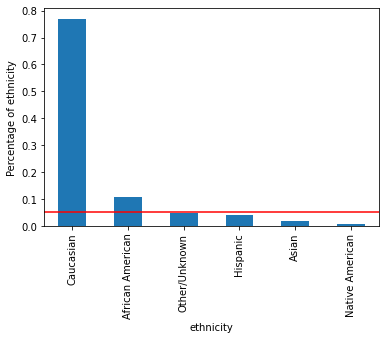

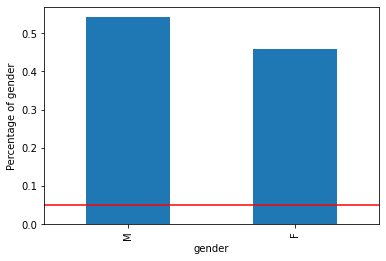

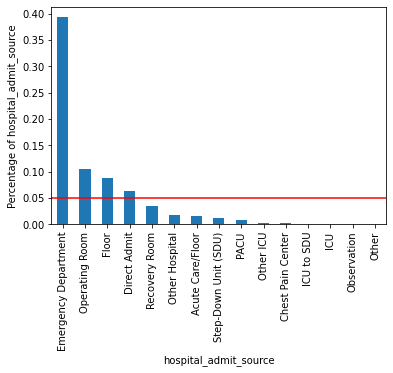

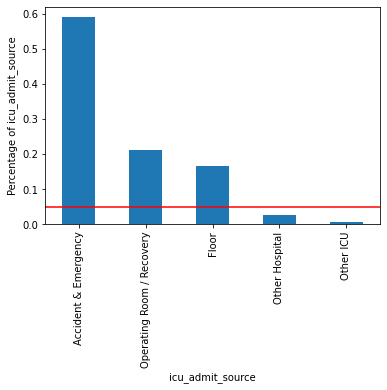

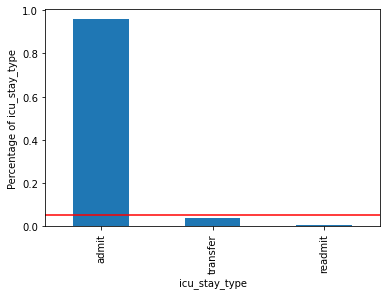

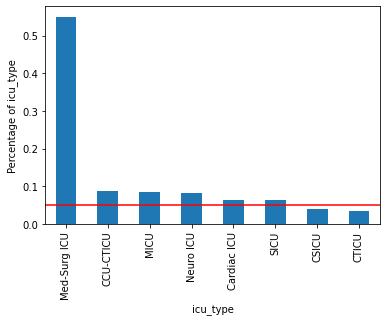

In [35]:
total_labels = len(X_train)

# for each categorical variable
for col in X_train.select_dtypes('object'):
    # calculate how many times the label is repeated in the whole dataset
    temp_df = pd.Series(X_train[col].value_counts() / total_labels)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel(f'Percentage of {col}')
    plt.show()

For each of the categorical variables, some labels appear in less than 5% of and many appear in less than 5% These are infrequent labels or Rare Values and could cause over-fitting.

In [36]:
X_train.head()

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
43394,50.0,34.113846,1,Caucasian,M,190.5,Operating Room,Operating Room / Recovery,498,admit,Med-Surg ICU,3.586111,0,123.80,2.5,302.0,1208.08,1,0,0.5,42.0,1.30,NaN,3.0,6.0,0.0,4.0,264.0,89.0,27.0,0,64.0,NaN,NaN,NaN,NaN,10.0,135.0,36.2,2172.7008,0,12.81,61.0,54.0,90.0,35.0,90.0,35.0,89.0,67.0,89.0,74.0,86.0,50.0,86.0,50.0,17.0,10.0,100.0,86.0,139.0,118.0,160.0,97.0,160.0,97.0,37.6,36.2,58.0,55.0,90.0,80.0,90.0,80.0,71.0,67.0,83.0,79.0,83.0,79.0,NaN,NaN,16.0,10.0,100.0,100.0,131.0,124.0,160.0,132.0,160.0,132.0,36.4,36.4,2.5,2.5,0.5,0.5,42.0,42.0,8.1,8.1,1.30,1.30,264.0,217.0,NaN,NaN,8.4,8.4,27.0,27.0,NaN,NaN,NaN,NaN,288.0,288.0,5.1,5.1,135.0,135.0,12.81,12.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.0,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
56044,22.0,20.147683,0,Caucasian,F,173.0,Direct Admit,Accident & Emergency,601,admit,MICU,0.352778,0,60.30,2.3,113.0,501.06,0,0,5.3,9.0,1.28,1.0,1.0,4.0,0.0,3.0,344.0,128.0,NaN,1,43.0,24.3,24.3,250.0,7.375,35.0,132.0,36.6,NaN,1,NaN,NaN,NaN,68.0,40.0,68.0,40.0,12

# Reduce cardinality
Group rare labels into one category - apply to train, then will do again to test data when finalize the preprocess with the pipeline step.

In [37]:
# Number of unique classes in each object column
X_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

ethnicity                 6
gender                    2
hospital_admit_source    15
icu_admit_source          5
icu_stay_type             3
icu_type                  8
dtype: int64

In [38]:
# I will replace all the labels that appear in less than 10%
# of the train_df by the label 'rare'


def group_rare_labels(df, var, tresh):

    total_obs = len(df)

    # first I calculate the % of obs for each category
    temp_df = pd.Series(df[var].value_counts() / total_obs)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of obs

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= tresh].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [39]:
# for each categorical variable
for col in X_train.select_dtypes('object'):
    X_train[col] = group_rare_labels(X_train, col, 0.1)


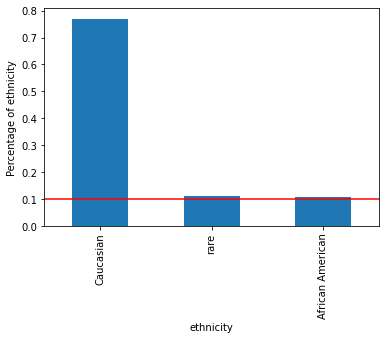

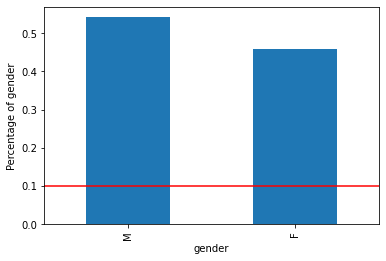

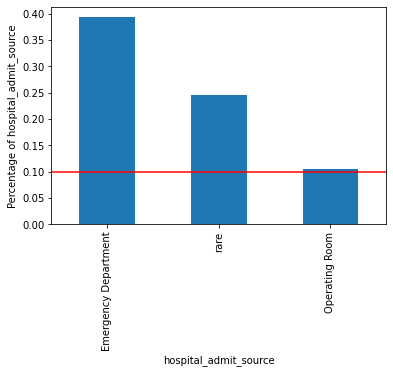

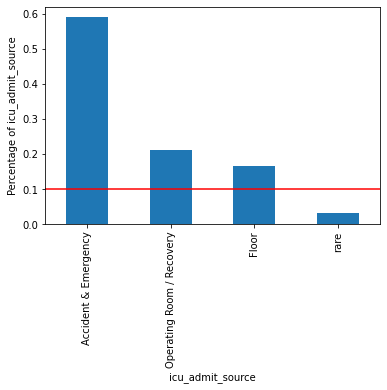

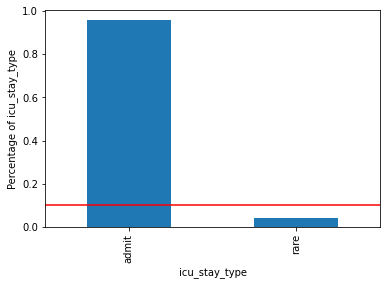

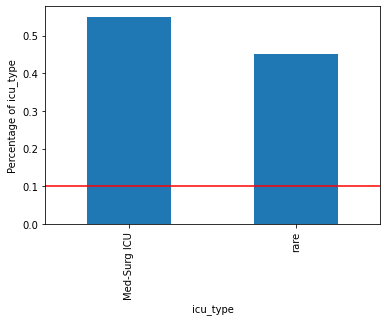

In [40]:
total_labels = len(X_train)

# for each categorical variable
for col in X_train.select_dtypes('object'):

    temp_df = pd.Series(X_train[col].value_counts() / total_labels)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.1, color='red')
    fig.set_ylabel(f'Percentage of {col}')
    plt.show()

In [41]:
# Number of unique classes in each object column
X_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

ethnicity                3
gender                   2
hospital_admit_source    3
icu_admit_source         4
icu_stay_type            2
icu_type                 2
dtype: int64

In [42]:
# Number of unique classes in each object column
X_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

ethnicity                 6
gender                    2
hospital_admit_source    15
icu_admit_source          5
icu_stay_type             3
icu_type                  8
dtype: int64

In [43]:
unique_to_train_set = [
    x for x in X_train['hospital_admit_source'].unique() if x not in X_test['hospital_admit_source'].unique()
]

print(unique_to_train_set)

['rare', nan]


In [44]:
unique_to_test_set = [
    x for x in X_test['hospital_admit_source'].unique() if x not in X_train['hospital_admit_source'].unique()
]

print(unique_to_test_set)

[nan, 'Step-Down Unit (SDU)', 'Floor', 'Recovery Room', 'Acute Care/Floor', 'Direct Admit', 'Other Hospital', 'PACU', 'Other ICU', 'ICU', 'ICU to SDU', 'Chest Pain Center', 'Observation', 'Other']


In [45]:
# for each categorical variable
for col in X_test.select_dtypes('object'):
    X_test[col] = group_rare_labels(X_test, col, 0.1)

In [46]:
X_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

ethnicity                3
gender                   2
hospital_admit_source    3
icu_admit_source         4
icu_stay_type            2
icu_type                 2
dtype: int64

In [ ]:
unique_to_test_set = [
    x for x in X_test['hospital_admit_source'].unique() if x not in X_train['hospital_admit_source'].unique()
]

print(unique_to_test_set)

--------
<hr>

# Group missing values
Arbitrary value imputation for categorical variables
This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.

This is in essence, the equivalent of replacing by an arbitrary value for numerical variables.

The beauty of this technique resides on the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data is high.

Advantages
Easy to implement
Fast way of obtaining complete datasets
Can be integrated in production (during model deployment)
Captures the importance of "missingness" if there is one
No assumption made on the data
Limitations
If the number of NA is small, creating an additional category may cause trees to over-fit
For categorical variables this is the method of choice, as it treats missing values as a separate category, without making any assumption on the variable or the reasons why data could be missing. 

In [11]:
def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = round(df.isnull().mean().mul(100), 2)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {df.index.name:'col_name', 0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data_type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0 ].sort_values(
        '% of Total Values', ascending=False)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table.reset_index()
missing = missing_zero_values_table(train_df.select_dtypes('object'))
missing.style.background_gradient(cmap='Reds')

Your selected dataframe has 6 columns and 130157 Rows.
There are 4 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,hospital_admit_source,33198,25.510000,object
1,ethnicity,1587,1.220000,object
2,icu_admit_source,240,0.180000,object
3,gender,66,0.050000,object


In [12]:
X_train['hospital_admit_source'].fillna('Missing', inplace=True)
X_test['hospital_admit_source'].fillna('Missing', inplace=True)

<Figure size 360x504 with 0 Axes>

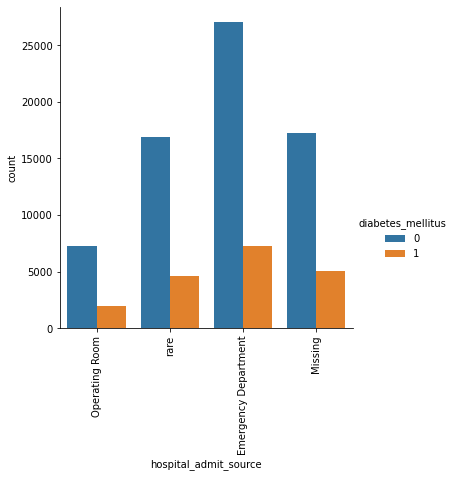

In [13]:
fig = plt.figure(figsize=(5, 7))
t = sns.catplot(data = X_train, x = 'hospital_admit_source', hue = 'diabetes_mellitus', kind = 'count')
t.set_xticklabels(rotation=90)
plt.show()


<Figure size 360x504 with 0 Axes>

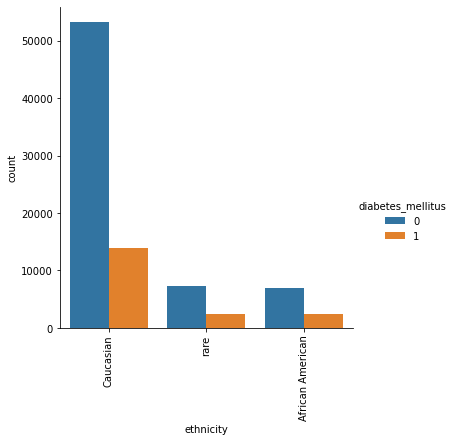

In [14]:
fig = plt.figure(figsize=(5, 7))
t = sns.catplot(data = X_train, x = 'ethnicity', hue = 'diabetes_mellitus', kind = 'count')
t.set_xticklabels(rotation=90)
plt.show()

<Figure size 360x504 with 0 Axes>

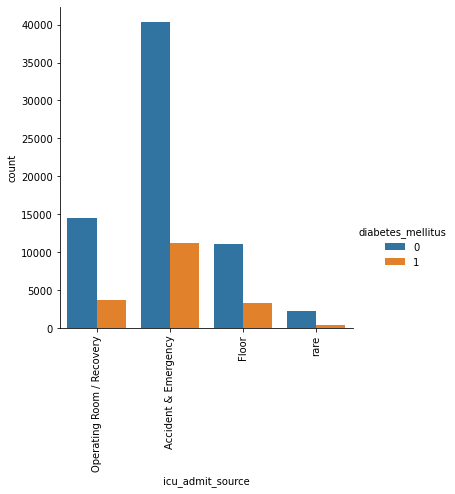

In [15]:
fig = plt.figure(figsize=(5, 7))
t = sns.catplot(data = X_train, x = 'icu_admit_source', hue = 'diabetes_mellitus', kind = 'count')
t.set_xticklabels(rotation=90)
plt.show()

<Figure size 360x504 with 0 Axes>

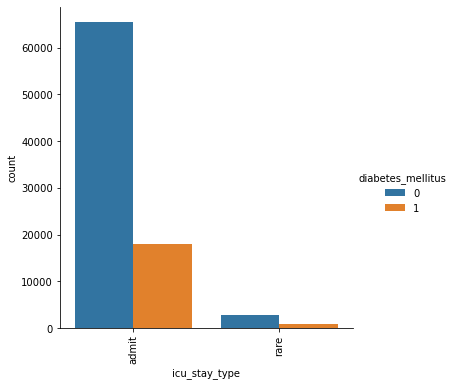

In [16]:
fig = plt.figure(figsize=(5, 7))
t = sns.catplot(data = X_train, x = 'icu_stay_type', hue = 'diabetes_mellitus', kind = 'count')
t.set_xticklabels(rotation=90)
plt.show()


<Figure size 360x504 with 0 Axes>

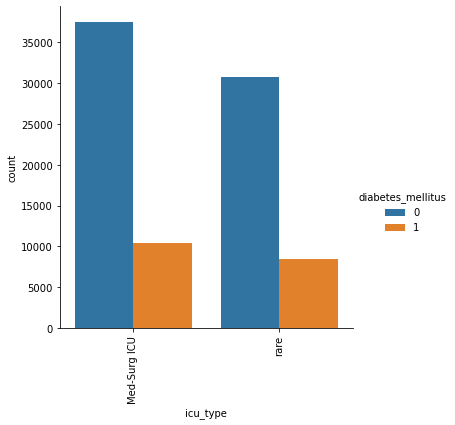

In [17]:

fig = plt.figure(figsize=(5, 7))
t = sns.catplot(data = X_train, x = 'icu_type', hue = 'diabetes_mellitus', kind = 'count')
t.set_xticklabels(rotation=90)
plt.show()

In [18]:
unique_to_train_set = [
    x for x in X_train['ethnicity'].unique() if x not in X_test['ethnicity'].unique()
]

print(unique_to_train_set)

['rare', nan]


In [19]:

unique_to_test_set = [
    x for x in X_test['ethnicity'].unique() if x not in X_train['ethnicity'].unique()
]

print(unique_to_test_set)

['Native American', 'Hispanic', 'Other/Unknown', nan, 'Asian']


In [20]:
# # for Q-Q plots
# import scipy.stats as stats
# def diagnostic_plots(df, variable):
#     # function takes a dataframe (df) and
#     # the variable of interest as arguments

#     # define figure size
#     plt.figure(figsize=(16, 4))

#     # histogram
#     plt.subplot(1, 3, 1)
#     sns.histplot(df[variable], bins=30)
#     plt.title('Histogram')

#     # Q-Q plot
#     plt.subplot(1, 3, 2)
#     stats.probplot(df[variable], dist="norm", plot=plt)
#     plt.ylabel('RM quantiles')

#     # boxplot
#     plt.subplot(1, 3, 3)
#     sns.boxplot(y=df[variable])
#     plt.title('Boxplot')

#     plt.show()

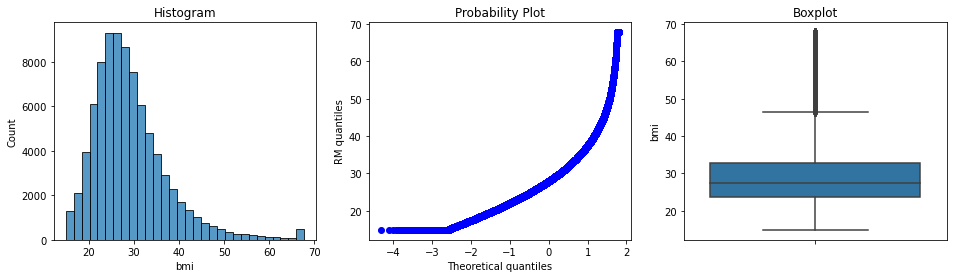

In [21]:
# diagnostic_plots(X_train, 'bmi')

In [22]:
# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

In [23]:
# # visualize outliers
# !pip install pyod -q
# from pyod.models.abod import ABOD


# Removing high correlated data

In [24]:
# X.columns

In [25]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor    

# def calculate_vif_(X, thresh=5.0):
#     variables = list(range(X.shape[1]))
#     dropped = True
#     while dropped:
#         dropped = False
#         vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
#                for ix in range(X.iloc[:, variables].shape[1])]

#         maxloc = vif.index(max(vif))
#         if max(vif) > thresh:
#             print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
#                   '\' at index: ' + str(maxloc))
#             del variables[maxloc]
#             dropped = True

#     print('Remaining variables:')
#     print(X.columns[variables])
#     return X.iloc[:, variables]